<a href="https://colab.research.google.com/github/priyanshu7466/Python/blob/main/Deep_Learning/Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Output Model

In [1]:
from keras.models import Model
from keras.layers import *

In [2]:
x = Input(shape=(3,))

In [3]:
hidden1 = Dense(128, activation='relu')(x)
hidden2 = Dense(64, activation='relu')(hidden1)

output1 = Dense(1, activation='linear')(hidden2)
output2 = Dense(1, activation='sigmoid')(hidden2)

In [4]:
model = Model(inputs=x, outputs=[output1, output2])

In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 3)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │            512 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 1)              │             65 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

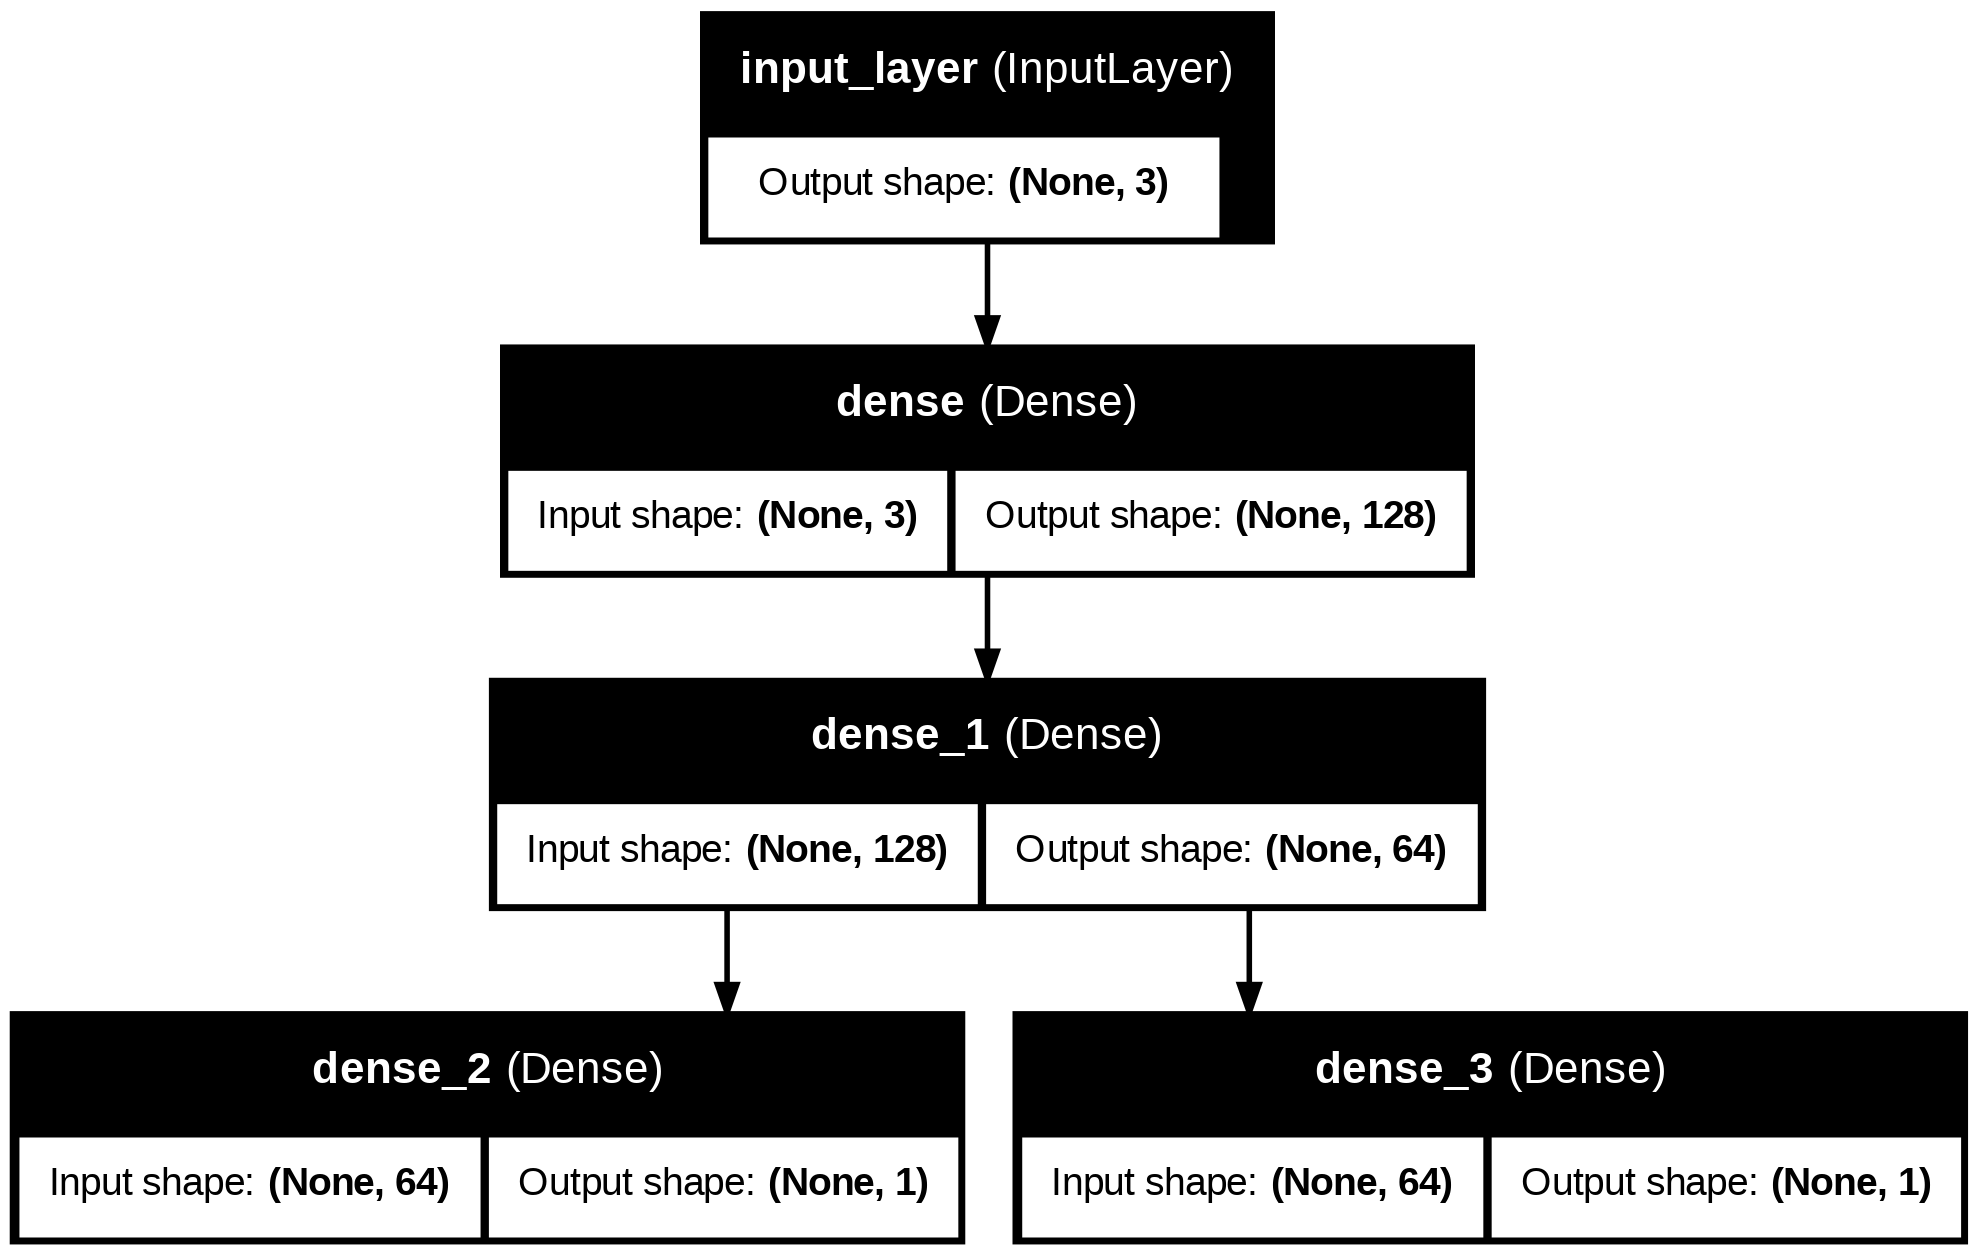

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='multi_output_model.png', show_shapes=True, show_layer_names=True)

# Multi Input

In [2]:
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))

In [3]:
x = Dense(8, activation='relu')(inputA)
x1 = Dense(4, activation='relu')(x)

y = Dense(64, activation='relu')(inputB)
y1 = Dense(32, activation='relu')(y)
y2 = Dense(4, activation='relu')(y1)

In [4]:
combined = concatenate([x1, y2])

In [5]:
z = Dense(2, activation='relu')(combined)
z1 = Dense(1, activation='linear')(z)

In [6]:
model = Model(inputs=[inputA, inputB], outputs=z1)

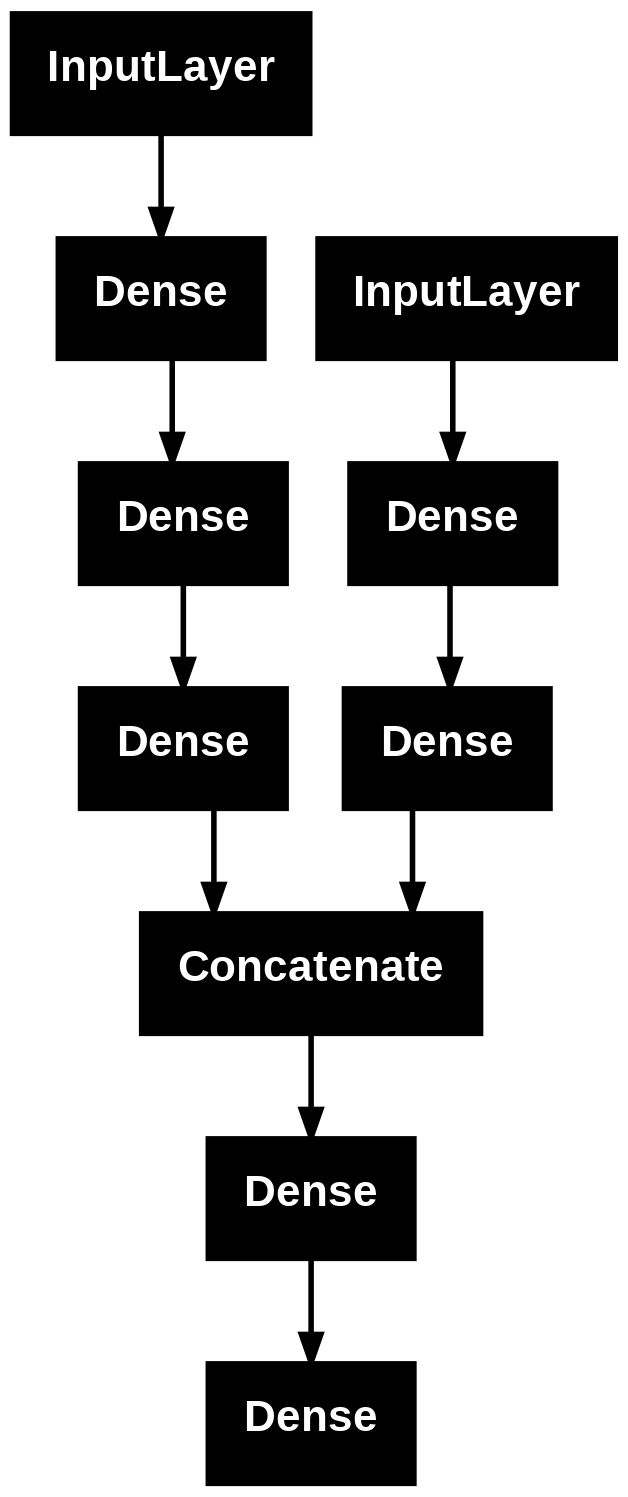

In [9]:
from keras.utils import plot_model
plot_model(model)

# Age-Gender Multi Output Problem

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [11]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 97% 321M/331M [00:02<00:00, 174MB/s]
100% 331M/331M [00:02<00:00, 154MB/s]


In [12]:
import zipfile
zip = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip.extractall("/content")
zip.close()

In [36]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
folder_path = '/content/utkface_aligned_cropped/UTKFace'

In [55]:
age = []
gender = []
img_path = []
for file in os.listdir(folder_path):
    age.append(int(file.split('_')[0]))
    gender.append(int(file.split('_')[1]))
    img_path.append(file)

In [56]:
len(age)

23708

In [57]:
df = pd.DataFrame({'age':age, 'gender':gender, 'img':img_path})

In [58]:
df.shape

(23708, 3)

In [59]:
df.head()

,age,gender,img
0,63,0,63_0_0_20170105180928702.jpg.chip.jpg
1,66,1,66_1_0_20170110141136857.jpg.chip.jpg
2,3,1,3_1_2_20161219141511144.jpg.chip.jpg
3,37,1,37_1_0_20170117183426542.jpg.chip.jpg
4,20,0,20_0_3_20170117151020539.jpg.chip.jpg


In [60]:
train_df = df.sample(frac=1,random_state=0).iloc[:20000]
test_df = df.sample(frac=1,random_state=0).iloc[20000:]

In [61]:
train_df.shape

(20000, 3)

In [62]:
test_df.shape

(3708, 3)

In [63]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)

In [64]:
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory = folder_path,
                                                    x_col='img',
                                                    y_col=['age', 'gender'],
                                                    target_size=(200, 200),
                                                    class_mode='multi_output',
                                                    )
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  directory = folder_path,
                                                  x_col='img',
                                                  y_col=['age', 'gender'],
                                                  target_size=(200, 200),
                                                  class_mode='multi_output',
                                                  )

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [65]:
from keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model

In [66]:
resnet = ResNet50(include_top=False, input_shape=(200, 200, 3))

In [67]:
resnet.trainable = False
output = resnet.layers[-1].output
flatten = Flatten()(output)

dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(flatten)

dense3 = Dense(512, activation='relu')(dense1)
dense4 = Dense(512, activation='relu')(dense2)

output1 = Dense(1, activation='linear', name='age')(dense3)
output2 = Dense(1, activation='sigmoid', name='gender')(dense4)

In [68]:
model = Model(inputs=resnet.input, outputs=[output1, output2])

In [69]:
model.compile(optimizer='adam', loss={'age':'mae', 'gender':'binary_crossentropy'}, metrics={'age':'mae', 'gender':'accuracy'}, loss_weights={'age':1, 'gender':99})

In [ ]:
def train_generator_fn():
  for batch_x, batch_y in train_generator:
    yield batch_x, {
        'age': batch_y[0].reshape(-1, 1),  # Reshape age to (None, 1)
        'gender': batch_y[1].reshape(-1, 1)  # Reshape gender to (None, 1)
    }

def test_generator_fn():
  for batch_x, batch_y in test_generator:
    yield batch_x, {
        'age': batch_y[0].reshape(-1, 1),  # Reshape age to (None, 1)
        'gender': batch_y[1].reshape(-1, 1)  # Reshape gender to (None, 1)
    }

output_signature = (
    tf.TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32),  # Input shape
    {
        'age': tf.TensorSpec(shape=(None, 1), dtype=tf.float32),
        'gender': tf.TensorSpec(shape=(None, 1), dtype=tf.float32)
    }
)


train_dataset = tf.data.Dataset.from_generator(
    train_generator_fn, output_signature=output_signature
)
test_dataset = tf.data.Dataset.from_generator(
    test_generator_fn, output_signature=output_signature
)
model.fit(train_dataset, batch_size=32, epochs=10, validation_data=test_dataset)

Epoch 1/10
     96/Unknown 662s 7s/step - age_loss: 18.0034 - age_mae: 18.0034 - gender_accuracy: 0.4831 - gender_loss: 3.5025 - loss: 364.7534